# Computing the trajectory of a baseball using the Euler method

Maximum range is 141.27442 meters.
Time of flight is 6.3 seconds.


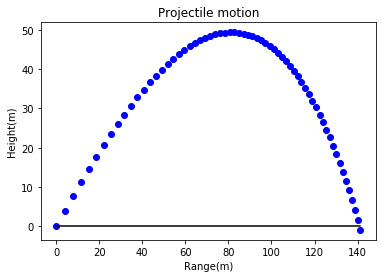

In [112]:
import numpy as np
import math
import matplotlib.pyplot as plt

maxstep = 1000                                  #Maximum number of steps
#r = input("Enter initial position r = [x,y]")  #in meters [m]
r = [0,0]
rx = np.zeros(maxstep)                          #initial x position
rx[0] = r[0]
ry = np.zeros(maxstep)                          #initial y position
ry[0] = r[1]
#v = input("Enter initial velocity v = [vx,vy]") #in [m/s]
v = [40,40]
vx = np.zeros(maxstep)                           #initial x velocity
vx[0] = v[0]
vy = np.zeros(maxstep)                           #initial y velocity
vy[0] = v[1]
#tau = input("Enter timestep, tau")              #in seconds [s]
tau = 0.1
Cd = 0.35                                       #Drag coefficient []
rho = 1.2                                       # Density of air [kg/m^3]
A = 4.3*10**(-3)                                #Cross-sectional area of projectile [m^2]
g = 9.81                                        #gravitational acceleration [m/s^2]
m = 0.145                                       #mass of projectile [kg]
air_const = -0.5*Cd*rho*A/m                     #Air resistance constant


#MAIN LOOP
for n in np.array(range(1,maxstep)):
    #print(n)
    m = n-1
    ax = air_const*math.sqrt(vx[m]**2+vy[m]**2)*vx[m]           #accelaration in x
    ay = air_const*math.sqrt(vx[m]**2+vy[m]**2)*vy[m] - g       #accelaration in y
    rx[n] = rx[m] + tau*vx[m]                                     #x position
    ry[n] = ry[m] + tau*vy[m]                                     #y position
    vx[n] = vx[m] + tau*ax                                      #velocity in x
    vy[n] = vy[m] + tau*ay                                      #velocity in y
    if ry[n] < 0:
        break
plt.plot(rx[range(n+1)],ry[range(n+1)], 'bo')
plt.title('Projectile motion')
plt.xlabel('Range(m)')
plt.ylabel('Height(m)')
plt.plot([0, rx[n]], [0, 0], 'k-')

print('Maximum range is', round(rx[n],5),'meters.')
print('Time of flight is', round(n*tau,5),'seconds.')
